In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x=pd.read_csv('linear_X.csv')
y=pd.read_csv('linear_Y.csv')
x.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [3]:
# convert into numpy arrays
x=x.values
y=y.values
print(type(x),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


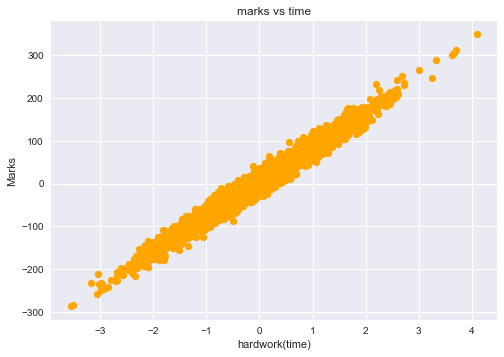

In [5]:
plt.style.use("seaborn")
plt.scatter(x,y,color='orange')
plt.title("marks vs time")
plt.xlabel("hardwork(time)")
plt.ylabel("Marks")
plt.show()

- Linear regression

In [6]:
def hypothesis(theta,x):# x is a vecto and theta is also a vector 
    h=theta[0]+theta[1]*x
    # theta=[theta0,theta1]
    return h

In [7]:
def error_(x,y,theta):# error_'s data type is number
    m=x.shape[0]# total examples
    total_error=0
    for i in range(m):# as index start fro 0 for this
        h=hypothesis(theta,x[i])
        total_error+=(h-y[i])**2
    return total_error/m
         

In [11]:
# gradient vector
def gradient_vec(x,y,theta):
    gradient=np.zeros((2,))# initializing
    m=x.shape[0]
    for i in range(m):
        h=hypothesis(theta,x[i])
        gradient[0]+=(h-y[i])
        
        gradient[1]+=(h-y[i])*x[i]
    return gradient/m

In [44]:
# Gradient_descent Algo inplemention
theta_list=[]
def gradient_desc(x,y,step_rate=0.1):
    # initialize theta
    theta=np.zeros((2,))# theta is an array -> mutable in thisa scope or we can use list as well,,,shape->(2,)->create a vector
    # of 2 elements ac directly access by vec[index] not by vect[index][0]
    # Or we can use list -> theta=[0,0]
    # Or can use theta=bp.array([0,0]) # a vector
    error_list=[]
    steps=50
    for i in range(steps):
        gradient=gradient_vec(x,y,theta)
        theta[0]=theta[0]-step_rate*gradient[0]
        theta[1]=theta[1]-step_rate*gradient[1]
        error_list.append(error_(x,y,theta))
        theta_list.append((theta[0],theta[1]))
    return error_list,theta,theta_list
        

In [45]:
error,theta,theta_list=gradient_desc(x,y)

In [18]:
print(theta)
print(type(theta))

[ 3.61706858 80.08041825]
<class 'numpy.ndarray'>


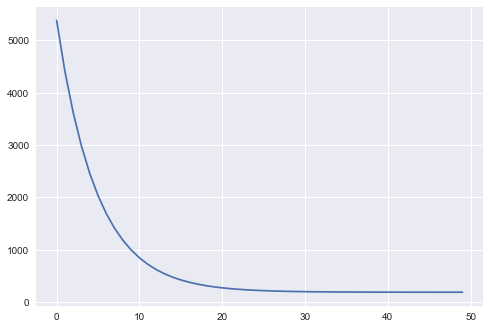

In [19]:
plt.plot(error)
plt.show()

- Predictions

In [22]:
y_=hypothesis(theta,x)# both theta and x are array -> so Broadcasting is applicable is here
# matrix + a vector ->Broadcasting
print(y_)

[[-19.55079038]
 [-43.53505301]
 [ 85.90029817]
 ...
 [-20.82056466]
 [137.81846909]
 [-35.7630567 ]]


#### Visualization on training data

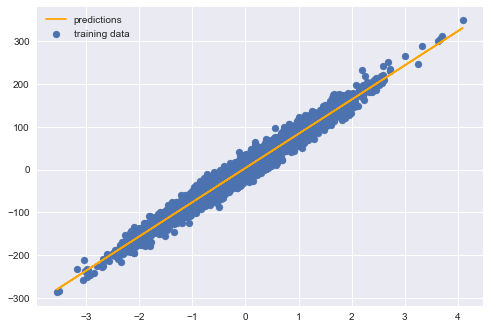

In [25]:
plt.scatter(x,y,label="training data")
plt.plot(x,y_,color='orange',label="predictions")
plt.legend()
plt.show()

In [26]:
# Testing our calculated theta for test data
x_test=pd.read_csv('x_test_linear.csv')
x_t=x_test.values
y_test=hypothesis(theta,x)
print(y_test)
print(type(y_test))# a array

[[-19.55079038]
 [-43.53505301]
 [ 85.90029817]
 ...
 [-20.82056466]
 [137.81846909]
 [-35.7630567 ]]
<class 'numpy.ndarray'>


In [27]:
# convert it again tinto csv file
df=pd.DataFrame(y_test,columns=["prediction"])
df.to_csv("y_test_csv_file",index=False)

#### Computing Accuracy

In [28]:
# score=determination of accuracy

In [31]:
def score(Y,Y_):
    d1=np.sum((Y-Y_)**2)
    d2=np.sum((Y-Y.mean())**2)# ar.mean() and np.mean(ar)->same but np.sum(ar) and sum(ar) are not same
    score=1-(d1/d2)
    return score*100

In [32]:
print("score is",score(y,y_))

score is 97.09277818541563


#### Visualising Loss Function, Gradient Descent Trajectory, Theta Updates


In [33]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [34]:
theta

array([ 3.61706858, 80.08041825])

In [36]:
# Loss Actually 
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*x + T0[i,j]
        J[i,j] = np.sum((y-y_)**2)/y.shape[0]

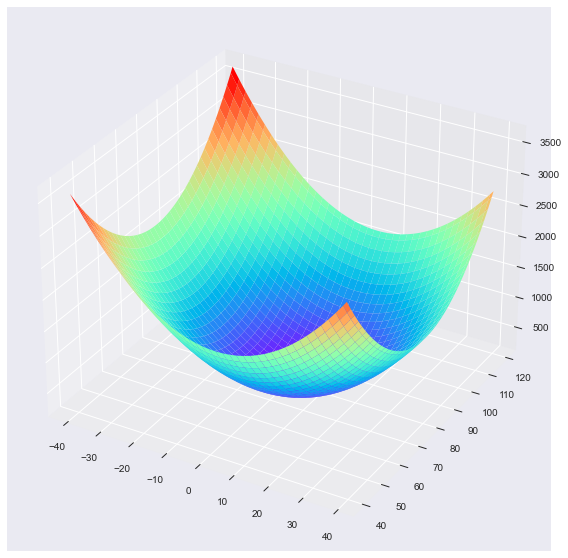

In [38]:

# Visualise the J (Loss)

fig = plt.figure(figsize=(10,10))
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

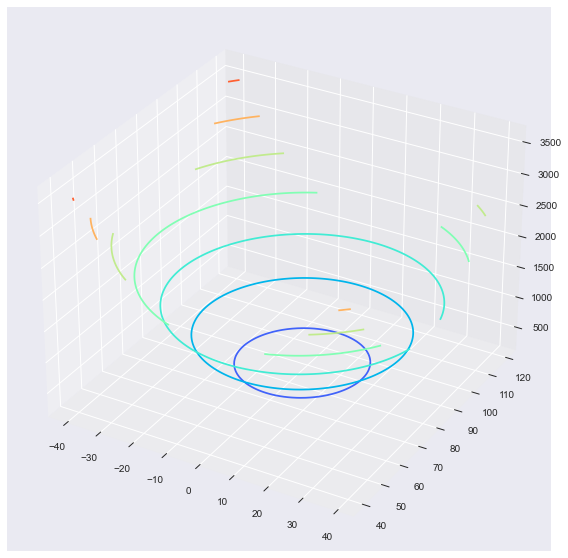

In [39]:

# Contour Plot 
fig = plt.figure(figsize=(10,10))
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

#### Plot the changes in values of theta

<class 'numpy.ndarray'>
(50,)


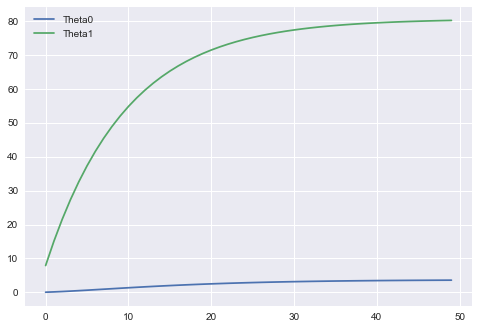

In [49]:
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
print(type(theta_list[:,0]))
print(theta_list[:,0].shape)# a vector as shape-> (n,) having n elements
plt.legend()
plt.show()

#### Trajectory traced by Theta Updates in the Loss Function

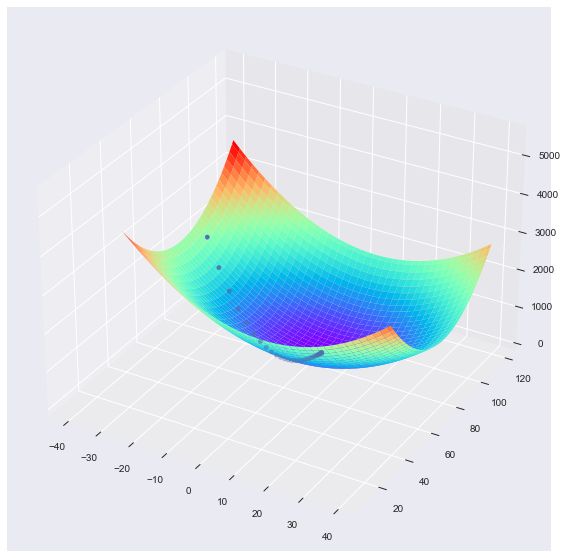

In [52]:

fig = plt.figure(figsize=(10,10))
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error)
plt.show()

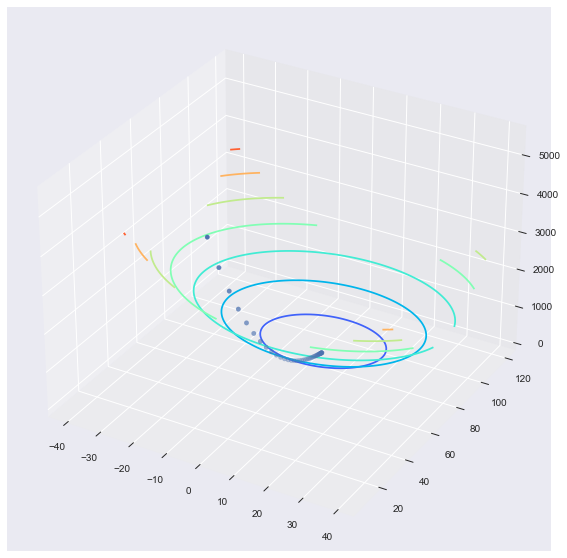

In [54]:

fig = plt.figure(figsize=(10,10))
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error)
plt.show()

####  2D Contour Plot 

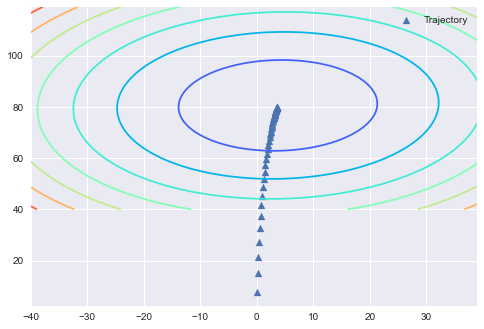

In [55]:
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],marker='^',label='Trajectory')
plt.legend()
plt.show()